# Задание 6. Применение bar charts и heat maps на новом наборе данных

В этом упражнении вы будете использовать свои новые знания, чтобы предложить решение для реального сценария. Чтобы добиться успеха, вам нужно будет импортировать данные в Python, отвечать на вопросы, используя данные, и создавать **гистограммы** и **тепловые карты**, чтобы понять закономерности в данных.

## Сценарий

Недавно вы решили создать свою собственную видеоигру! Будучи активным читателем [Обзоров игр IGN] (https://www.ign.com/reviews/games), вы узнаете обо всех последних выпусках игр, а также о рейтинге, который они получили от экспертов, начиная от от 0 (_Катастрофа_) до 10 (_Шедевр_).

![ex2_ign](https://i.imgur.com/Oh06Fu1.png)

Вы заинтересованы в использовании [обзоров IGN](https://www.ign.com/reviews/games) для разработки дизайна вашей будущей игры. К счастью, кто-то обобщил рейтинги в действительно полезном CSV-файле, который вы можете использовать для анализа.

## Настройка
Запустите следующую ячейку, чтобы импортировать и настроить библиотеки Python, необходимые для выполнения упражнения.

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


# Просмотрите данные
Прочитайте файл с помощью pandas и встроенной функции read_csv()

In [2]:
# Путь до файла
ign_filepath = "datasets/ign_scores.csv"

# Заполните линию ниже, чтобы прочитать файл с помощью переменной candy_data
ign_data = pd.read_csv(ign_filepath, index_col="Platform")

Используйте команду Python для печати полного набора данных.

In [3]:
ign_data

,Action,"Action, Adventure",Adventure,Fighting,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
Dreamcast,6.882857,7.511111,6.281818,8.200000,8.340000,8.088889,7.700000,7.042500,7.616667,7.628571,7.272222,6.433333
Game Boy Advance,6.373077,7.507692,6.057143,6.226316,6.970588,6.532143,7.542857,6.657143,6.444444,6.928571,6.694444,7.175000
Game Boy Color,6.272727,8.166667,5.307692,4.500000,6.352941,6.583333,7.285714,5.897436,4.500000,5.900000,5.790698,7.400000
GameCube,6.532584,7.608333,6.753846,7.422222,6.665714,6.133333,7.890909,6.852632,6.981818,8.028571,7.481319,7.116667
Nintendo 3DS,6.670833,7.481818,7.414286,6.614286,7.503448,8.000000,7.719231,6.900000,7.033333,7.700000,6.388889,7.900000
Nintendo 64,6.649057,8.250000,7.000000,5.681250,6.889655,7.461538,6.050000,6.939623,8.042857,5.675000,6.967857,6.900000
Nintendo DS,5.903608,7.240000,6.259804,6.320000,6.840000,6.604615,7.222619,6.038636,6.965217,5.874359,5.936667,6.644737
Nintendo DSi,6.827027,8.500000,6.090909,7.500000,7.250000,6.810526,7.166667,6.563636,6.500000,5.195652,5.644444,6.566667
PC,6.805791,7.334746,7.136798,7.166667,7.410938,6.924706,7.759930,7.032418,7.084878,7.104889,6.902424,7.310207


Набор данных, который вы только что напечатали, показывает средний балл по платформам и жанрам. Используйте данные, чтобы ответить на приведенные ниже вопросы.

In [ ]:
# Заполните строку ниже: Какой самый высокий средний балл, полученный компьютерными играми, для любого жанра?
high_score = 7.759930

# Заполните строку ниже: На платформе Playstation Vita, какой жанр имеет самый низкий средний балл? 
# Укажите название столбца и поместите свой ответ в одинарных кавычках (например,'Action', 'Adventure', 'Fighting', и т. д.)
worst_genre = 'Simulation'

## Какая платформа лучше?

Насколько вы помните, вашей любимой видеоигрой была [**Mario Kart Wii**](https://www.ign.com/games/mario-kart-wii), гоночная игра, выпущенная для платформы Wii в 2008 году. И IGN соглашается с вами, что это отличная игра — их рейтинг для этой игры — колоссальные 8,9! Вдохновленный успехом этой игры, вы подумываете о создании собственной гоночной игры для платформы Wii.

### Часть А

Создайте гистограмму, показывающую средний балл **гонок** игр для каждой платформы. На вашем графике должно быть по одному столбцу для каждой платформы.

Первый вариант решения

Text(0.5, 1.0, 'Average Score for Racing Games, by Platform')

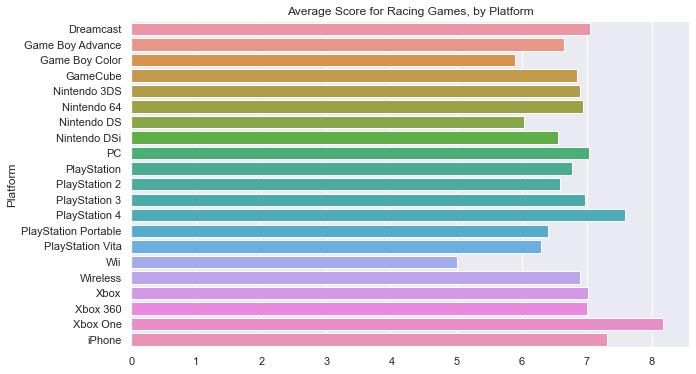

In [9]:
plt.figure(figsize=(10, 6))
# для удобства можно значения колонки индексации разместить по оси Y
sns.barplot(x=ign_data['Racing'], y=ign_data.index)
plt.xlabel("")
plt.title("Average Score for Racing Games, by Platform")

Второй вариант решения

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Dreamcast'),
  Text(1, 0, 'Game Boy Advance'),
  Text(2, 0, 'Game Boy Color'),
  Text(3, 0, 'GameCube'),
  Text(4, 0, 'Nintendo 3DS'),
  Text(5, 0, 'Nintendo 64'),
  Text(6, 0, 'Nintendo DS'),
  Text(7, 0, 'Nintendo DSi'),
  Text(8, 0, 'PC'),
  Text(9, 0, 'PlayStation'),
  Text(10, 0, 'PlayStation 2'),
  Text(11, 0, 'PlayStation 3'),
  Text(12, 0, 'PlayStation 4'),
  Text(13, 0, 'PlayStation Portable'),
  Text(14, 0, 'PlayStation Vita'),
  Text(15, 0, 'Wii'),
  Text(16, 0, 'Wireless'),
  Text(17, 0, 'Xbox'),
  Text(18, 0, 'Xbox 360'),
  Text(19, 0, 'Xbox One'),
  Text(20, 0, 'iPhone')])

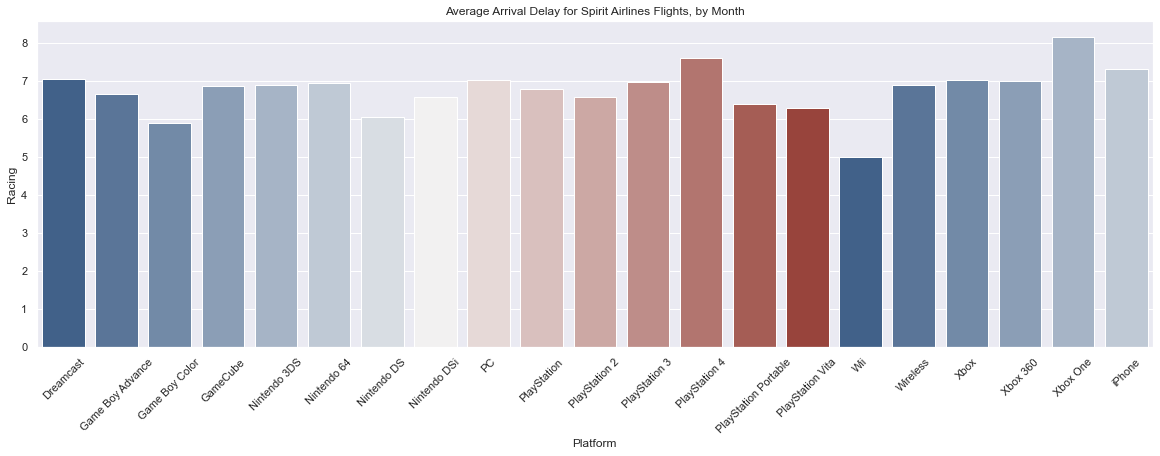

In [8]:
plt.figure(figsize=(20,6))
# вы могли задать тему графику
sns.set_theme(style="darkgrid")

plt.title("Average Arrival Delay for Spirit Airlines Flights, by Month")
# можно было поменять палитру
palette = sns.diverging_palette(250, 15, s=75, l=40, n=15)
sns.barplot(x=ign_data.index, y=ign_data.Racing, palette = palette)
# текст по оси X можно повернуть с помощью этой функции
plt.xticks(rotation=45)

### Часть Б
Судя по гистограмме, ожидаете ли вы, что гоночная игра для платформы Wii получит высокий рейтинг? Если нет, то какая игровая платформа кажется лучшей альтернативой?

#### Ответ
Судя по данным, не стоит ожидать, что гоночная игра для платформы Wii получит высокий рейтинг. Фактически, в среднем гоночные игры для Wii получают более низкие оценки, чем для любой другой платформы. Xbox One кажется лучшей альтернативой, так как имеет самые высокие средние рейтинги.

## Все возможные комбинации!

В конце концов, вы решаете не создавать гоночную игру для Wii, но по-прежнему полны решимости создать собственную видеоигру! Поскольку ваши игровые интересы довольно широки (_... вы обычно любите большинство видеоигр_), вы решаете использовать данные IGN, чтобы сообщить о своем новом выборе жанра и платформы.

### Часть А

Используйте данные, чтобы создать тепловую карту среднего балла по жанрам и платформам.

Text(0.5, 1.0, 'Average Game Score, by Platform and Genre')

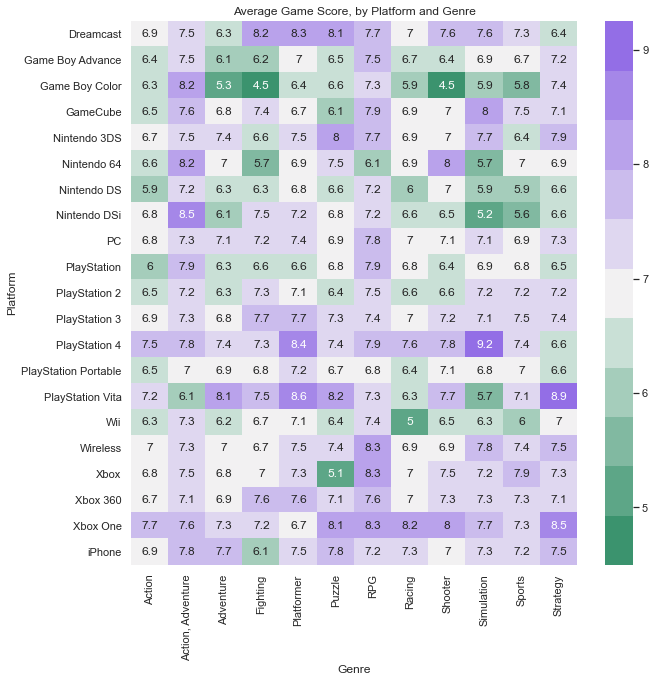

In [11]:
plt.figure(figsize=(10,10))
cmap = sns.diverging_palette(150, 275, s=80, l=55, n=11)
sns.heatmap(ign_data, cmap = cmap, annot=True)
plt.xlabel("Genre")
plt.title("Average Game Score, by Platform and Genre")

### Часть Б

Какое сочетание жанра и платформы получает самые высокие средние оценки? Какая комбинация получает самый низкий средний рейтинг?

#### Ответ
Игры-симуляторы для Playstation 4 получают самые высокие средние оценки (9,2). Игры-стрелялки и файтинги для Game Boy Color получают самые низкие средние оценки (4,5).